In [50]:
import pandas as pd
import os,sys,codecs,csv,pickle,string
from pprint import pprint
import numpy as np
from funding_analysis import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create a list of the CSV files and the relevant year
csv_files = [f for f in os.listdir() if (f.endswith('.csv') and f.find('_PRJABS_')>-1) ]
csv_files = [(d,s) for d in range(4000) for s in csv_files if s.endswith('FY'+str(d)+'.csv') ]
pprint(csv_files)


[]


In [ ]:
# load the pickle files into two arrays: abstracts and years
abstracts = list()
years = list()
for I in range(len(csv_files)):
    (year,abstract_text_list_of_sets) = decompress_pickle(csv_files[I][1].replace('.csv',''))
    abstracts.append(abstract_text_list_of_sets)
    years.append(year)
    print('Finished loading ', year)
abstracts = np.array(abstracts)
years = np.array(years)
print(years)
print('Saving...',end=' ')
compressed_pickle('all_data___abstracts_years', (years,abstracts))
print( 'finished saving.')

In [4]:
# load single big pickle file w/data from all years
filedir = '/Users/lcarey/Nutstore Files/Nutstore/funding_analysis/'
(years,abstracts) = decompress_pickle(filedir + 'all_data___abstracts_years')


In [60]:
# count the frequency of each model organism
unique_years = sorted(set(years))
keywords = ['yeast','cancer','zebrafish','elegans','crispr','evolution','xenopus','genome','phase','autophagy']
for keyword in keywords:
    for year in unique_years:
        s,p,l = CountGrantsInOneYearWithWord( abstracts[years==year][0] , keyword)
        print(year,keyword,p,sep='\t')
        d = {'year':year, 'keyword':keyword, 'NumGrants':s, 'PctGrants':p, 'TotalGrantsThisYear':l }
        tmp_df = pd.DataFrame(d,index=[0])
        if 'df' in dir():
            df = df.append(tmp_df)
        else:
            df = tmp_df
            
print(df)     



2004	yeast	2.678209116732044
2005	yeast	2.624805364009025
2006	yeast	2.5473700762638574
2007	yeast	2.4490466798159107
2008	yeast	2.329778753741333
2009	yeast	2.174079126875853
2010	yeast	2.0356380169464283
2011	yeast	1.9107117238141198
2012	yeast	1.7945241855459741
2013	yeast	1.6099124610099325
2014	yeast	1.517709009593883
2015	yeast	1.4383864931651644
2016	yeast	1.3728658750790417
2017	yeast	1.260007152879034
2018	yeast	1.2288040636438335
2019	yeast	1.174666734249075
2004	cancer	12.812420157205764
2005	cancer	14.415774254027774
2006	cancer	15.38642975076657
2007	cancer	16.58000119538581
2008	cancer	18.15392482740987
2009	cancer	18.74706684856753
2010	cancer	18.983214310317116
2011	cancer	19.60142423017229
2012	cancer	21.34701122276418
2013	cancer	19.87954404979229
2014	cancer	19.8052369616966
2015	cancer	19.67032810067277
2016	cancer	19.557366683060494
2017	cancer	19.37054664502462
2018	cancer	23.03727496825278
2019	cancer	20.012418267524964
2004	zebrafish	0.5335377308865744
2005	zebr

In [72]:
# count the frequency of each model organism
unique_years = sorted(set(years))
#keywords = ['autophagy','coli','bacteria','antibiotics','antibiotic']
keywords = ['phage']
for keyword in keywords:
    print(keyword,p,sep='\t')
    for year in unique_years:
        s,p,l = CountGrantsInOneYearWithWord( abstracts[years==year][0] , keyword)
        d = {'year':year, 'keyword':keyword, 'NumGrants':s, 'PctGrants':p, 'TotalGrantsThisYear':l }
        tmp_df = pd.DataFrame(d,index=[0])
        if 'df' in dir():
            df = df.append(tmp_df)
        else:
            df = tmp_df
            
print(df)     

phage	1.3647422575903492
    year keyword  NumGrants  PctGrants  TotalGrantsThisYear
0   2004   yeast       1782   2.678209                66537
0   2005   yeast       1652   2.624805                62938
0   2006   yeast       1620   2.547370                63595
0   2007   yeast       1639   2.449047                66924
0   2008   yeast       1549   2.329779                66487
..   ...     ...        ...        ...                  ...
0   2015   phage        151   0.215687                70009
0   2016   phage        164   0.230450                71165
0   2017   phage        156   0.214586                72698
0   2018   phage        170   0.211648                80322
0   2019   phage        176   0.223022                78916

[432 rows x 5 columns]


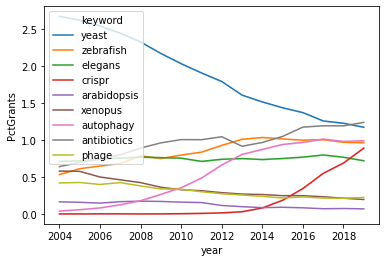

In [73]:
#G.plot(x='year',y='PctGrants',subplots=True,sharey=True)
df2 = df[df.keyword != 'phase']
df2 = df2[df2.keyword != 'cancer']
df2 = df2[df2.keyword != 'genome']
df2 = df2[df2.keyword != 'antibiotic']
df2 = df2[df2.keyword != 'evolution']
df2 = df2[df2.keyword != 'coli']
df2 = df2[df2.keyword != 'bacteria']

#df2 = df2.drop(columns=['NumGrants','TotalGrantsThisYear'])
#df2 = df2.set_index(['year','keyword'])
df2.head()
sns.lineplot(data=df2,x='year',y='PctGrants',hue='keyword')
#plt.show()
#G = df2.groupby(['keyword','year'])
#G.head()
#G.plot()
#plt.ylabel('% of NIH grants with the word')
#plt.xlabel('Year')

In [ ]:
print(len(abstracts[years==year][0]))
print(len(abstracts[years==year] ))
print(list(abstracts[1][1])[:25])  # first 100 words in one abstract in one year